# In this notebook, we will (FINALLY) merge our crm and bo data. And then, we will build a sales prediction model 

# Merging datasets

In [41]:
# importing libraries I will need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [43]:
# Importing datasets
bo_clean = pd.read_csv('bo_clean.csv')
bo_for_tableau = pd.read_csv('bo_for_tableau.csv')
jobs_clean = pd.read_csv('crm_jobs_clean.csv')
jobs_for_tableau = pd.read_csv('crm_jobs_for_tableau.csv')

In [44]:
# Merging datasets for model prediction purpose :
merge_for_prediction = pd.merge(left = jobs_clean, right = bo_clean, how = 'left', left_on = "bo_job_id", right_on= "ignition_id")        

display(merge_for_prediction.shape)
merge_for_prediction.head()

(3731, 62)

,Unnamed: 0_x,deal_id,number_of_times_contacted,number_of_sales_activities,forecast_amount,_%_du_contract,score_prévisionnel_de_l_opport,bo_job_id,number_of_associated_contacts,weighted_amount,deal_probability,amount,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,deal_owner,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,métier,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,associated_company_id,associated_company,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,deals_duration,Unnamed: 0_y,ignition_id,hubspot_id,company_hubspot_id,pitch_validated,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,nb_match_offer,nb_match_hired,salary_estimated,month_created_bo,weekday_created_bo,year_created_bo,job_title,company_name,ignition_owner_name,experience_min_wanted,potential_manager,company_market_type
0,0,9.004430e+09,1.0,2.0,3000.0,25.0,3.0,12242.0,1.0,3000.0,0.2,15000.0,0.4,0.8,1.0,0.0,0.0,0.0,0.0,1.0,23.0,2.0,1.0,3.0,0.0,2.2,1.0,37.0,0.0,0.0,1.0,546.0,757.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2219.0,12242.0,9.004430e+09,5.260444e+09,0.0,9.0,5.0,1.0,1.0,1.0,1.0,85.0,5.0,2.0,2022.0,2425.0,764.0,25.0,3.0,0.2,9.0
1,1,9.004015e+09,1.8,4.0,1694.0,22.0,4.0,12241.0,3.0,1694.0,0.2,8470.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,1.0,52.0,0.0,0.0,1.0,820.0,982.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2204.0,12241.0,9.004015e+09,6.334049e+09,0.0,1.0,4.6,4.2,1.2,1.0,1.0,62.0,5.0,2.0,2022.0,3060.0,992.0,0.0,1.2,0.0,2.6
2,2,9.003734e+09,1.8,4.0,1802.8,25.0,3.0,12239.0,1.0,1226.8,0.2,6134.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,2.0,1.0,3.0,0.0,60.0,0.0,0.0,0.0,629.0,746.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2178.0,12239.0,9.003734e+09,5.824623e+09,0.0,6.0,4.0,2.4,2.0,1.0,1.0,70.0,5.0,2.0,2022.0,1862.0,753.0,10.0,1.0,0.2,4.0
3,3,9.000719e+09,1.8,4.0,720.0,20.0,4.0,12238.0,2.0,720.0,0.2,3600.0,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,47.0,0.0,3.6,0.0,1.0,2.4,1.0,37.8,0.0,0.0,1.0,919.0,56.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2121.0,12238.0,9.000719e+09,7.398558e+09,1.0,6.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,135.0,59.0,51.0,1.4,0.4,5.0
4,4,9.000825e+09,1.8,4.0,3600.0,20.0,4.0,12237.0,2.0,720.0,0.2,3600.0,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,47.0,0.0,4.0,0.0,1.0,2.2,1.0,52.0,0.0,0.0,1.0,919.0,56.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2123.0,12237.0,9.000825e+09,7.398558e+09,1.0,7.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,137.0,59.0,51.0,1.4,0.2,5.0


In [45]:
# Merging datasets for model prediction purpose :
merge_for_tableau = pd.merge(left = jobs_for_tableau, right = bo_for_tableau, how = 'left', left_on = "bo_job_id", right_on= "ignition_id")        

display(merge_for_tableau.shape)
merge_for_tableau.head()

(3731, 62)

,Unnamed: 0_x,deal_id,number_of_times_contacted,number_of_sales_activities,forecast_amount,_%_du_contract,score_prévisionnel_de_l_opport,bo_job_id,number_of_associated_contacts,weighted_amount,deal_probability,amount,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,deal_owner,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,métier,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,associated_company_id,associated_company,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,deals_duration,Unnamed: 0_y,ignition_id,hubspot_id,company_hubspot_id,pitch_validated,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,nb_match_offer,nb_match_hired,salary_estimated,month_created_bo,weekday_created_bo,year_created_bo,job_title,company_name,ignition_owner_name,experience_min_wanted,potential_manager,company_market_type
0,0,9.004430e+09,1.0,2.0,3000.0,25.0,3.0,12242.0,1.0,3000.0,0.2,15000.0,NaN,NaN,Croissance / Growth,Bonne / Good,Offline Sources,25%,Non,Très importante (canaux internes / autres cabi...,Jeanne Patfoort,Senior : 6 years and more,Marketing,Les MéMER,La boîte attire difficilement nos profils,NaN,Repeat,Head of Growth,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,5260443686,Roadstr,On-going,5,2,2022,6.0,3.0,2022.0,36.0,2219.0,12242.0,9.004430e+09,5.260444e+09,0.0,9.0,5.0,1.0,1.0,1.0,1.0,85.0,5.0,2.0,2022.0,Roadstr - Head of Acquisition,Roadstr,Jeanne Patfoort,Senior : 6 to 9 years,NaN,Mobilité / Transport
1,1,9.004015e+09,1.8,4.0,1694.0,22.0,4.0,12241.0,3.0,1694.0,0.2,8470.0,France,Hot,Croissance / Growth,Bonne / Good,Offline Sources,special contract,Non,Très importante (canaux internes / autres cabi...,Agathe Benoit,Junior : 0 to 2 years,Sales,Les Merines,"La boîte est ""sexy"" et attire facilement les c...",Lead Entrant (via formulaire marketing) / Inbo...,Repeat,SDR - Inside Sales,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,6334048617,Yavin,On-going,5,2,2022,6.0,3.0,2022.0,36.0,2204.0,12241.0,9.004015e+09,6.334049e+09,0.0,1.0,4.6,4.2,1.2,1.0,1.0,62.0,5.0,2.0,2022.0,Yavin - Inside Sales,Yavin,Agathe Benoit,NaN,NaN,NaN
2,2,9.003734e+09,1.8,4.0,1802.8,25.0,3.0,12239.0,1.0,1226.8,0.2,6134.0,France,Tiède,Compétences / Competencies,Bonne / Good,Offline Sources,25%,Non,Aucune / None,Chloé Marchand,Junior : 0 to 2 years,Marketing,Les Merines,"La boîte est ""sexy"" et attire facilement les c...",Prospection - cold call ou réseau perso / Pros...,New,Traffic Manager / Acquisition (SEA) Manager,Bonne / Good,Best case,Attendront d'avoir le bon candidat / Will wait...,5824622674,Reglo,On-going,5,2,2022,6.0,3.0,2022.0,36.0,2178.0,12239.0,9.003734e+09,5.824623e+09,0.0,6.0,4.0,2.4,2.0,1.0,1.0,70.0,5.0,2.0,2022.0,Marketing Manager,Reglo,Chloé Marchand,Junior : 0 to 2 years,NaN,Food / Boisson
3,3,9.000719e+09,1.8,4.0,720.0,20.0,4.0,12238.0,2.0,720.0,0.2,3600.0,International,NaN,Croissance / Growth,Bonne / Good,Offline Sources,special contract,Non,Très importante (canaux internes / autres cabi...,Vera Cunha,Junior : 0 to 2 years,NaN,International,"La boîte est ""sexy"" et attire facilement les c...",NaN,Repeat,NaN,Bonne / Good,Best case,Très urgent (pour hier) / Very urgent (for yes...,7398557579,Amenitiz,On-going,5,2,2022,6.0,3.0,2022.0,36.0,2121.0,12238.0,9.000719e+09,7.398558e+09,1.0,6.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,Amenitiz - IT SDR,Amenitiz,Vera Cunha,NaN,NaN,NaN
4,4,9.000825e+09,1.8,4.0,3600.0,20.0,4.0,12237.0,2.0,720.0,0.2,3600.0,International,NaN,Croissance / Growth,Bonne / Good,Offline Sources,special contract,Non,Très importante (canaux internes / autres cabi...,Vera Cunha,Junior : 0 to 2 years,Sales,International,"La boîte est ""sexy"" et attire facilement les c...",NaN,Repeat,SDR - Inside Sales,Bonne / Good,Best case,Très urgent (pou

In [46]:
# Exporting to CSV to be able to use this dataframe on Tableau :
merge_for_tableau.to_csv('merge_for_tableau.csv')

# Final data cleaning before building our prediction model

In [47]:
merge_for_prediction.head()

,Unnamed: 0_x,deal_id,number_of_times_contacted,number_of_sales_activities,forecast_amount,_%_du_contract,score_prévisionnel_de_l_opport,bo_job_id,number_of_associated_contacts,weighted_amount,deal_probability,amount,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,deal_owner,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,métier,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,associated_company_id,associated_company,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,deals_duration,Unnamed: 0_y,ignition_id,hubspot_id,company_hubspot_id,pitch_validated,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,nb_match_offer,nb_match_hired,salary_estimated,month_created_bo,weekday_created_bo,year_created_bo,job_title,company_name,ignition_owner_name,experience_min_wanted,potential_manager,company_market_type
0,0,9.004430e+09,1.0,2.0,3000.0,25.0,3.0,12242.0,1.0,3000.0,0.2,15000.0,0.4,0.8,1.0,0.0,0.0,0.0,0.0,1.0,23.0,2.0,1.0,3.0,0.0,2.2,1.0,37.0,0.0,0.0,1.0,546.0,757.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2219.0,12242.0,9.004430e+09,5.260444e+09,0.0,9.0,5.0,1.0,1.0,1.0,1.0,85.0,5.0,2.0,2022.0,2425.0,764.0,25.0,3.0,0.2,9.0
1,1,9.004015e+09,1.8,4.0,1694.0,22.0,4.0,12241.0,3.0,1694.0,0.2,8470.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0,1.0,1.0,52.0,0.0,0.0,1.0,820.0,982.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2204.0,12241.0,9.004015e+09,6.334049e+09,0.0,1.0,4.6,4.2,1.2,1.0,1.0,62.0,5.0,2.0,2022.0,3060.0,992.0,0.0,1.2,0.0,2.6
2,2,9.003734e+09,1.8,4.0,1802.8,25.0,3.0,12239.0,1.0,1226.8,0.2,6134.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,2.0,1.0,3.0,0.0,60.0,0.0,0.0,0.0,629.0,746.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2178.0,12239.0,9.003734e+09,5.824623e+09,0.0,6.0,4.0,2.4,2.0,1.0,1.0,70.0,5.0,2.0,2022.0,1862.0,753.0,10.0,1.0,0.2,4.0
3,3,9.000719e+09,1.8,4.0,720.0,20.0,4.0,12238.0,2.0,720.0,0.2,3600.0,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,47.0,0.0,3.6,0.0,1.0,2.4,1.0,37.8,0.0,0.0,1.0,919.0,56.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2121.0,12238.0,9.000719e+09,7.398558e+09,1.0,6.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,135.0,59.0,51.0,1.4,0.4,5.0
4,4,9.000825e+09,1.8,4.0,3600.0,20.0,4.0,12237.0,2.0,720.0,0.2,3600.0,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,47.0,0.0,4.0,0.0,1.0,2.2,1.0,52.0,0.0,0.0,1.0,919.0,56.0,1.0,5,2,2022,6.0,3.0,2022.0,36.0,2123.0,12237.0,9.000825e+09,7.398558e+09,1.0,7.0,6.2,6.6,2.2,1.2,1.0,47.4,5.0,1.0,2022.0,137.0,59.0,51.0,1.4,0.2,5.0


In [48]:
# There are many columns which would have a bad impact on prediction model. We need to drop them :
merge_for_prediction = merge_for_prediction.drop(['Unnamed: 0_x', 'deal_id', 'bo_job_id', 'deal_owner', 'métier', 
                                                 'associated_company_id', 'associated_company', 'Unnamed: 0_y',
                                                 'ignition_id', 'hubspot_id', 'company_hubspot_id', 'job_title', 
                                                 'company_name', 'ignition_owner_name'], axis = 1)

In [49]:
merge_for_prediction.shape

(3731, 48)

In [50]:
merge_for_prediction.isna().sum()

number_of_times_contacted                      0
number_of_sales_activities                     0
forecast_amount                                0
_%_du_contract                                 0
score_prévisionnel_de_l_opport                 0
number_of_associated_contacts                  0
weighted_amount                                0
deal_probability                               0
amount                                         0
pays                                           0
tiering                                        0
croissance                                     0
réactivité_du_client                           0
original_source_type                           0
_%_du_contract.1                               0
remplacement                                   0
concurrence_sur_le_poste_?                     0
nombre_d_années_d_expériences                  0
catégorie_métier_du_job                        0
hubspot_team                                   0
la_boîte_attire-t-el

In [51]:
# Let's drop the rows with NA's (it corresponds to the difference of number or rows on our merged dataframes)
merge_for_prediction = merge_for_prediction[(merge_for_prediction['pitch_validated'].isna()==False) & 
                                            (merge_for_prediction['nb_match_proposed'].isna()==False) &
                                            (merge_for_prediction['nb_match_to_pitch'].isna()==False) &
                                            (merge_for_prediction['nb_match_pitched'].isna()==False) &
                                            (merge_for_prediction['nb_match_interview'].isna()==False) &
                                            (merge_for_prediction['nb_match_offer'].isna()==False) &
                                            (merge_for_prediction['nb_match_hired'].isna()==False) &
                                            (merge_for_prediction['salary_estimated'].isna()==False) &
                                            (merge_for_prediction['month_created_bo'].isna()==False) &
                                            (merge_for_prediction['weekday_created_bo'].isna()==False) &
                                            (merge_for_prediction['year_created_bo'].isna()==False) &
                                            (merge_for_prediction['experience_min_wanted'].isna()==False) &
                                            (merge_for_prediction['potential_manager'].isna()==False) &
                                            (merge_for_prediction['company_market_type'].isna()==False)]

merge_for_prediction.isna().sum()

number_of_times_contacted                     0
number_of_sales_activities                    0
forecast_amount                               0
_%_du_contract                                0
score_prévisionnel_de_l_opport                0
number_of_associated_contacts                 0
weighted_amount                               0
deal_probability                              0
amount                                        0
pays                                          0
tiering                                       0
croissance                                    0
réactivité_du_client                          0
original_source_type                          0
_%_du_contract.1                              0
remplacement                                  0
concurrence_sur_le_poste_?                    0
nombre_d_années_d_expériences                 0
catégorie_métier_du_job                       0
hubspot_team                                  0
la_boîte_attire-t-elle_nos_candidats_?  

In [52]:
merge_for_prediction.shape

(3703, 48)

# Exploratory analysis : distribution, correlation, and class imbalance

In [53]:
# Let's check unique values for numericals using a loop :
for col in merge_for_prediction.columns :
    print("The number of unique values for",col, "is :", merge_for_prediction[col].nunique())

The number of unique values for number_of_times_contacted is : 231
The number of unique values for number_of_sales_activities is : 322
The number of unique values for forecast_amount is : 441
The number of unique values for _%_du_contract is : 46
The number of unique values for score_prévisionnel_de_l_opport is : 5
The number of unique values for number_of_associated_contacts is : 6
The number of unique values for weighted_amount is : 469
The number of unique values for deal_probability is : 4
The number of unique values for amount is : 491
The number of unique values for pays is : 6
The number of unique values for tiering is : 11
The number of unique values for croissance is : 6
The number of unique values for réactivité_du_client is : 6
The number of unique values for original_source_type is : 3
The number of unique values for _%_du_contract.1 is : 2
The number of unique values for remplacement is : 5
The number of unique values for concurrence_sur_le_poste_? is : 6
The number of uni

In [54]:
# Splitting between discrete and continuous variables :
def split_dataframe(df, number_uniques = 50) : 
    df2 = df.copy()
    continuous_list = []
    discrete_list = []
    for col in list(df2.columns) :
        if (df2[col].nunique() > number_uniques) : 
            continuous_list.append(col)
        else : 
            discrete_list.append(col) 
    continuous_df = df2[continuous_list]
    discrete_df = df2[discrete_list]
    return continuous_df, discrete_df

In [55]:
continuous_df, discrete_df = split_dataframe(merge_for_prediction,50)
display(continuous_df.head())
display(discrete_df.head())
continuous_df.shape

,number_of_times_contacted,number_of_sales_activities,forecast_amount,weighted_amount,amount,deals_duration,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,salary_estimated,company_market_type
0,1.0,2.0,3000.0,3000.0,15000.0,36.0,9.0,5.0,1.0,1.0,85.0,9.0
1,1.8,4.0,1694.0,1694.0,8470.0,36.0,1.0,4.6,4.2,1.2,62.0,2.6
2,1.8,4.0,1802.8,1226.8,6134.0,36.0,6.0,4.0,2.4,2.0,70.0,4.0
3,1.8,4.0,720.0,720.0,3600.0,36.0,6.0,6.2,6.6,2.2,47.4,5.0
4,1.8,4.0,3600.0,720.0,3600.0,36.0,7.0,6.2,6.6,2.2,47.4,5.0


,_%_du_contract,score_prévisionnel_de_l_opport,number_of_associated_contacts,deal_probability,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,pitch_validated,nb_match_offer,nb_match_hired,month_created_bo,weekday_created_bo,year_created_bo,experience_min_wanted,potential_manager
0,25.0,3.0,1.0,0.2,0.4,0.8,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,0.0,2.2,1.0,0.0,0.0,1.0,1.0,5,2,2022,6.0,3.0,2022.0,0.0,1.0,1.0,5.0,2.0,2022.0,3.0,0.2
1,22.0,4.0,3.0,0.2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,5,2,2022,6.0,3.0,2022.0,0.0,1.0,1.0,5.0,2.0,2022.0,1.2,0.0
2,25.0,3.0,1.0,0.2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,5,2,2022,6.0,3.0,2022.0,0.0,1.0,1.0,5.0,2.0,2022.0,1.0,0.2
3,20.0,4.0,2.0,0.2,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.6,0.0,1.0,2.4,1.0,0.0,0.0,1.0,1.0,5,2,2022,6.0,3.0,2022.0,1.0,1.2,1.0,5.0,1.0,2022.0,1.4,0.4
4,20.0,4.0,2.0,0.2,1.0,1.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,2.2,1.0,0.0,0.0,1.0,1.0,5,2,2022,6.0,3.0,2022.0,1.0,1.2,1.0,5.0,1.0,2022.0,1.4,0.2


(3703, 12)

In [56]:
# Plotting discrete and continuous variables to check which transformation to apply
def plot_discrete(x) :
    sns.countplot(x)
    plt.show()
    
#discrete_df.apply(plot_discrete)

In [57]:
# Let's drop also _%_du_contract
discrete_df = discrete_df.drop(['_%_du_contract'], axis = 1)

In [58]:
def plot_continuous(x) :
    sns.displot(x)
    plt.show()
    
#continuous_df.apply(plot_continuous)

In [59]:
# Now let's check for outliers 
def plot_outliers(x) :
    sns.boxplot(x = x)
    plt.show()
    
#continuous_df.apply(plot_outliers)

In [60]:
# There are too many outliers, let's drop them using a function :
def remove_outliers(df, q1_value = 20, q3_value = 80) :
    df2 = df.copy().astype(float)
    for col in df2.columns :
        iqr = np.percentile(df2[col], q3_value) - np.percentile(df2[col],q1_value)
        upper_limit = np.percentile(df2[col], q3_value) + 1.5*iqr
        df2 = df2[df2[col] < upper_limit]
    return df2

In [61]:
continuous_no_outliers = remove_outliers(continuous_df)
continuous_no_outliers.shape

(2885, 12)

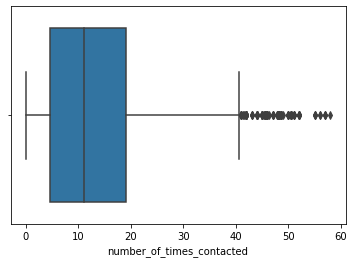

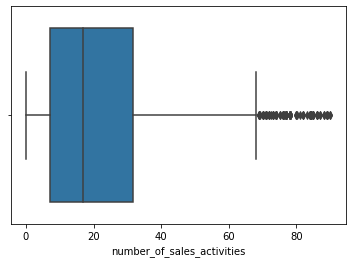

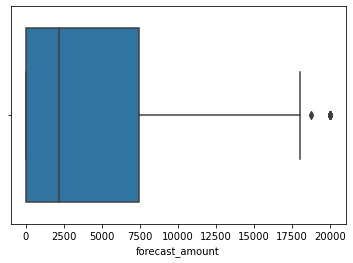

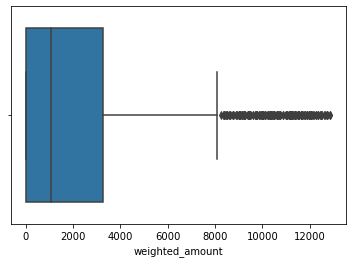

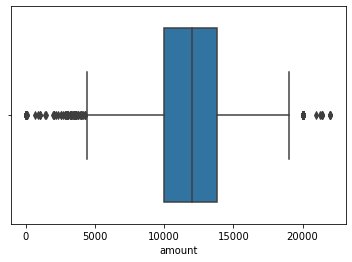

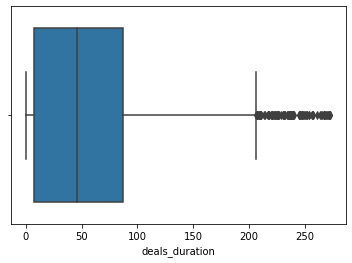

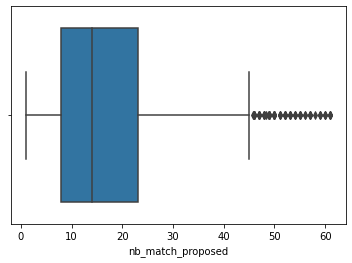

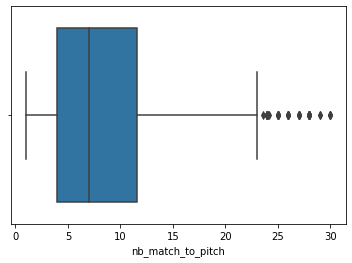

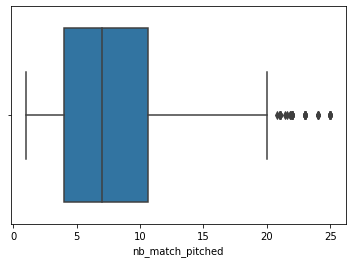

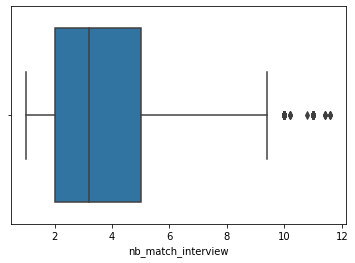

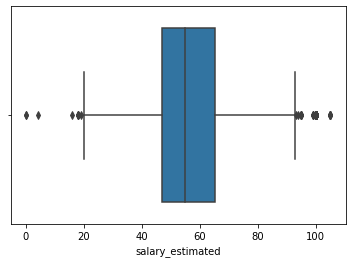

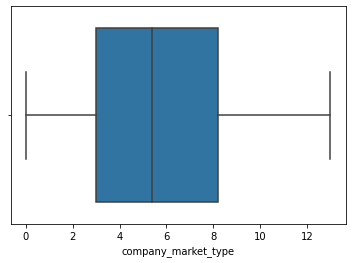

number_of_times_contacted     None
number_of_sales_activities    None
forecast_amount               None
weighted_amount               None
amount                        None
deals_duration                None
nb_match_proposed             None
nb_match_to_pitch             None
nb_match_pitched              None
nb_match_interview            None
salary_estimated              None
company_market_type           None
dtype: object

In [62]:
continuous_no_outliers.apply(plot_outliers)

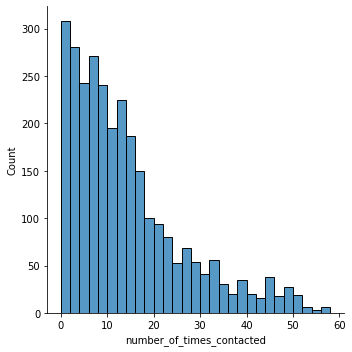

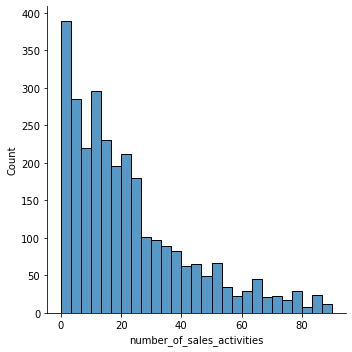

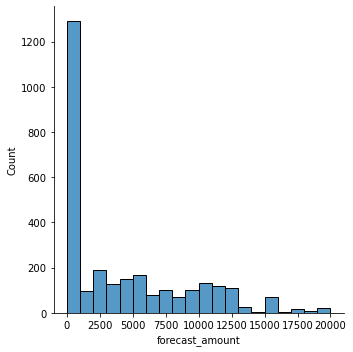

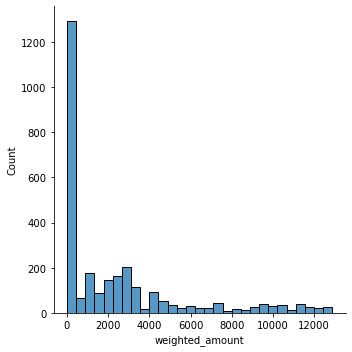

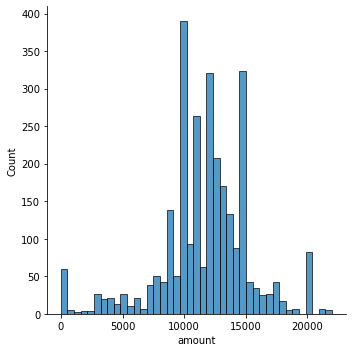

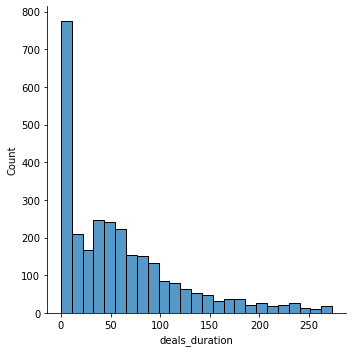

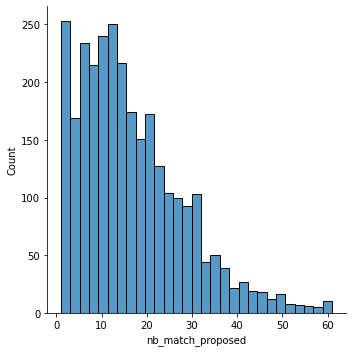

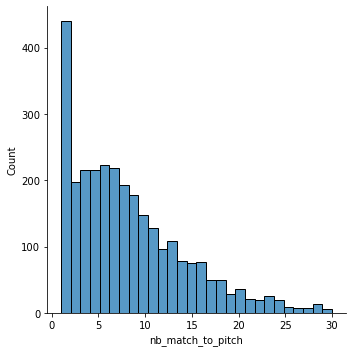

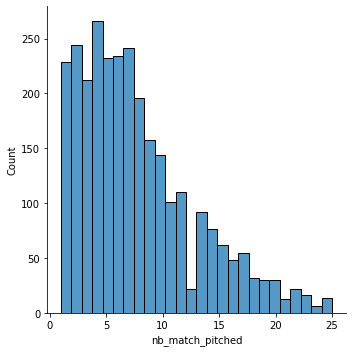

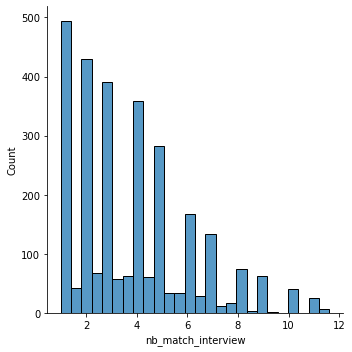

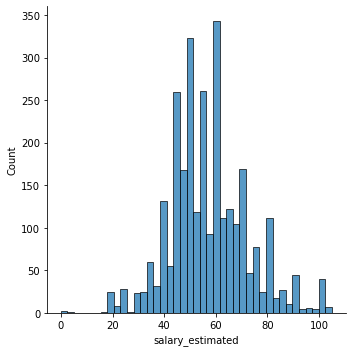

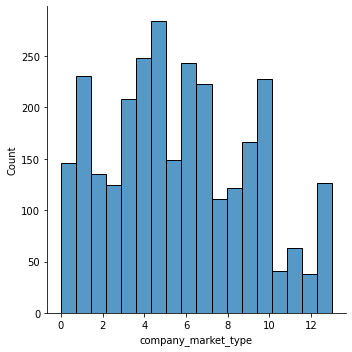

number_of_times_contacted     None
number_of_sales_activities    None
forecast_amount               None
weighted_amount               None
amount                        None
deals_duration                None
nb_match_proposed             None
nb_match_to_pitch             None
nb_match_pitched              None
nb_match_interview            None
salary_estimated              None
company_market_type           None
dtype: object

In [63]:
continuous_no_outliers.apply(plot_continuous)

In [ ]:
# Amount and salary_estimated follows a normal distribution !!

In [ ]:
# Let's concatenate back our discrete and continuous dataframe :

In [64]:
df_for_prediction = pd.concat([continuous_no_outliers.reset_index(drop = True), discrete_df.reset_index(drop = True)], axis = 1)

In [65]:
df_for_prediction.isna().sum()

number_of_times_contacted                     818
number_of_sales_activities                    818
forecast_amount                               818
weighted_amount                               818
amount                                        818
deals_duration                                818
nb_match_proposed                             818
nb_match_to_pitch                             818
nb_match_pitched                              818
nb_match_interview                            818
salary_estimated                              818
company_market_type                           818
score_prévisionnel_de_l_opport                  0
number_of_associated_contacts                   0
deal_probability                                0
pays                                            0
tiering                                         0
croissance                                      0
réactivité_du_client                            0
original_source_type                            0


In [66]:
# Let's drop the rows with NaN's (which correspond to outliers we removed before)

for col in df_for_prediction.columns :
    if (df_for_prediction[col].isna().sum() != 0) :
        df_for_prediction = df_for_prediction[df_for_prediction[col].isna() == False]

df_for_prediction.isna().sum()

number_of_times_contacted                     0
number_of_sales_activities                    0
forecast_amount                               0
weighted_amount                               0
amount                                        0
deals_duration                                0
nb_match_proposed                             0
nb_match_to_pitch                             0
nb_match_pitched                              0
nb_match_interview                            0
salary_estimated                              0
company_market_type                           0
score_prévisionnel_de_l_opport                0
number_of_associated_contacts                 0
deal_probability                              0
pays                                          0
tiering                                       0
croissance                                    0
réactivité_du_client                          0
original_source_type                          0
_%_du_contract.1                        

In [67]:
# Let's check correlation between variables with correlation matrix :
df_for_prediction.corr()

,number_of_times_contacted,number_of_sales_activities,forecast_amount,weighted_amount,amount,deals_duration,nb_match_proposed,nb_match_to_pitch,nb_match_pitched,nb_match_interview,salary_estimated,company_market_type,score_prévisionnel_de_l_opport,number_of_associated_contacts,deal_probability,pays,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,nombre_d_années_d_expériences,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,pitch_validated,nb_match_offer,nb_match_hired,month_created_bo,weekday_created_bo,year_created_bo,experience_min_wanted,potential_manager
number_of_times_contacted,1.000000,0.977821,0.022168,0.055405,0.043798,0.020999,0.086954,0.102018,0.118158,0.137141,0.002420,-0.026861,-0.079445,-0.056718,0.035831,-0.002464,-0.011037,0.000697,-0.001644,-0.000166,0.067714,0.012089,-0.017797,0.024830,-0.002037,0.022826,-0.000637,0.022833,-0.017604,0.001891,0.090098,0.013281,-0.014308,0.074028,0.001703,-0.221016,0.067630,-0.015169,-0.044412,0.029129,0.111866,0.078841,0.087791,-0.010915,-0.197132,0.004399,-0.049945
number_of_sales_activities,0.977821,1.000000,0.027918,0.067668,0.042834,0.022733,0.094028,0.102522,0.116016,0.136847,0.000580,-0.022545,-0.071690,-0.058240,0.036142,-0.008341,-0.017276,-0.005604,-0.006739,-0.008444,0.061850,0.009544,-0.015190,0.032528,-0.015237,0.029084,-0.003974,0.025724,-0.017082,0.007480,0.082106,0.012787,-0.013465,0.073503,0.004538,-0.213280,0.069730,-0.015060,-0.039715,0.028909,0.109490,0.076697,0.087378,-0.005795,-0.189244,0.006822,-0.049180
forecast_amount,0.022168,0.027918,1.000000,0.687969,0.184742,-0.240454,0.075838,0.060403,0.045720,0.029650,0.030299,-0.005993,-0.086886,-0.008107,0.006081,-0.012792,-0.009332,0.012127,-0.023569,0.007421,0.039487,-0.008934,-0.012063,0.018043,-0.040822,0.055382,0.019981,-0.011491,0.001301,0.002351,-0.054330,0.019116,0.025696,-0.178836,0.055916,0.103890,-0.004221,0.028773,-0.029459,-0.032865,-0.006537,-0.018028,-0.167798,0.039751,0.045402,-0.050842,-0.005238
weighted_amount,0.055405,0.067668,0.687969,1.000000,0.066595,-0.260096,0.054991,0.076564,0.074426,0.081094,-0.033373,0.017558,-0.119916,-0.053483,0.004162,-0.011566,0.010399,0.006152,-0.014228,-0.017263,0.073375,-0.013091,-0.000381,0.024388,-0.026696,0.050946,0.040998,0.042200,-0.001736,0.024256,0.037227,0.028008,-0.016473,-0.104486,0.040961,-0.040549,-0.011932,-0.009583,-0.067684,-0.021290,0.003183,-0.015699,-0.091437,0.025260,-0.084254,-0.035562,-0.035092
amount,0.043798,0.042834,0.184742,0.066595,1.000000,-0.017615,0.055416,-0.005902,-0.001374,-0.013756,0.350892,0.003847,-0.019418,-0.005136,-0.033255,0.011885,-0.013302,0.009267,-0.018619,0.020909,0.009801,0.029072,-0.002342,0.021925,-0.005503,-0.006153,0.028349,-0.005572,-0.029504,0.003924,0.027276,-0.003167,-0.026456,0.000425,0.008716,-0.009610,-0.004401,0.019454,-0.020823,0.020897,0.016934,0.023571,0.003723,0.010442,-0.012075,-0.011784,0.026039
deals_duration,0.020999,0.022733,-0.240454,-0.260096,-0.017615,1.000000,0.165145,0.070412,0.061909,-0.019905,0.072953,0.030829,0.228615,0.064019,-0.041447,-0.012940,0.023616,-0.005114,0.002877,0.019908,-0.115642,0.013630,0.001867,0.016083,0.052335,-0.047489,-0.049995,-0.022015,0.000101,-0.004971,0.019869,-0.050478,-0.033572,0.219785,-0.065180,-0.005228,0.009520,0.029546,0.117868,0.049271,-0.012514,-0.000470,0.193187,-0.032926,0.061153,0.076276,0.035442
nb_match_proposed,0.086954,0.094028,0.075838,0.054991,0.055416,0.165145,1.000000,0.651911,0.627593,0.386766,0.011730,0.016142,-0.042042,-0.021336,0.010094,0.000311,-0.014942,-0.005297,-0.002404,-0.028309,0.017646,-0.004008,0.022104,0.027342,0.004296,0.017546,0.039252,0.025160,-0.012335,-0.041153,0.038693,-0.035576,-0.011010,-0.013872,0.024750,-0.045741,0.000696,-0.029696,-0.0049

In [ ]:
We want to check correlations with the column AMOUNT.

Amount is lightly correlated with salary_estimated

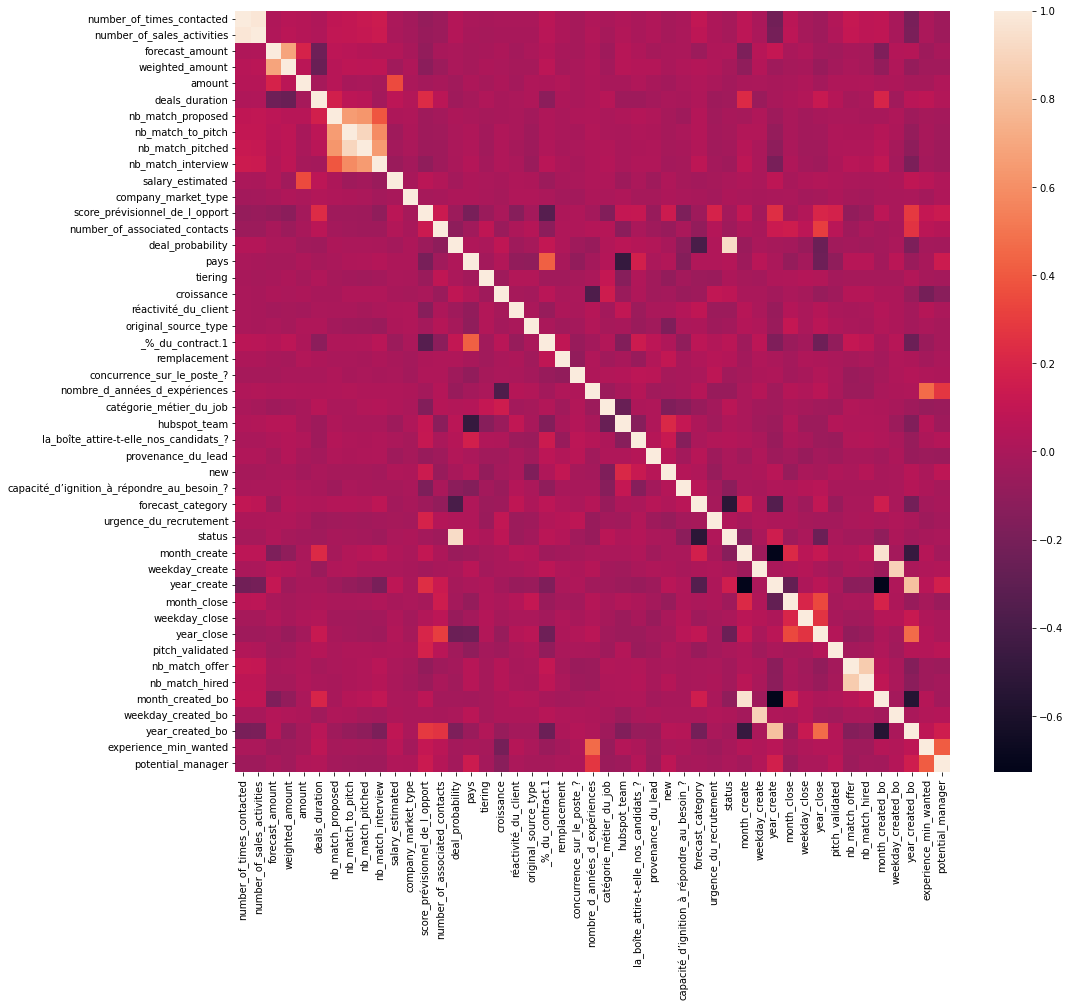

In [68]:
corr_matrix = df_for_prediction.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix)
plt.show()

In [69]:
df_multicoll = df_for_prediction[['amount', 'salary_estimated', 'number_of_times_contacted', 'number_of_sales_activities', 'forecast_amount', 'weighted_amount',
                                  'nb_match_proposed', 'nb_match_to_pitch', 'nb_match_pitched', 'nb_match_interview', 'status', 'deal_probability', 
                                  'nb_match_offer', 'nb_match_hired', 'pays','_%_du_contract.1', 'nombre_d_années_d_expériences', 'experience_min_wanted',
                                 'month_create', 'weekday_create', 'year_create','month_created_bo', 'weekday_created_bo', 'year_created_bo']]

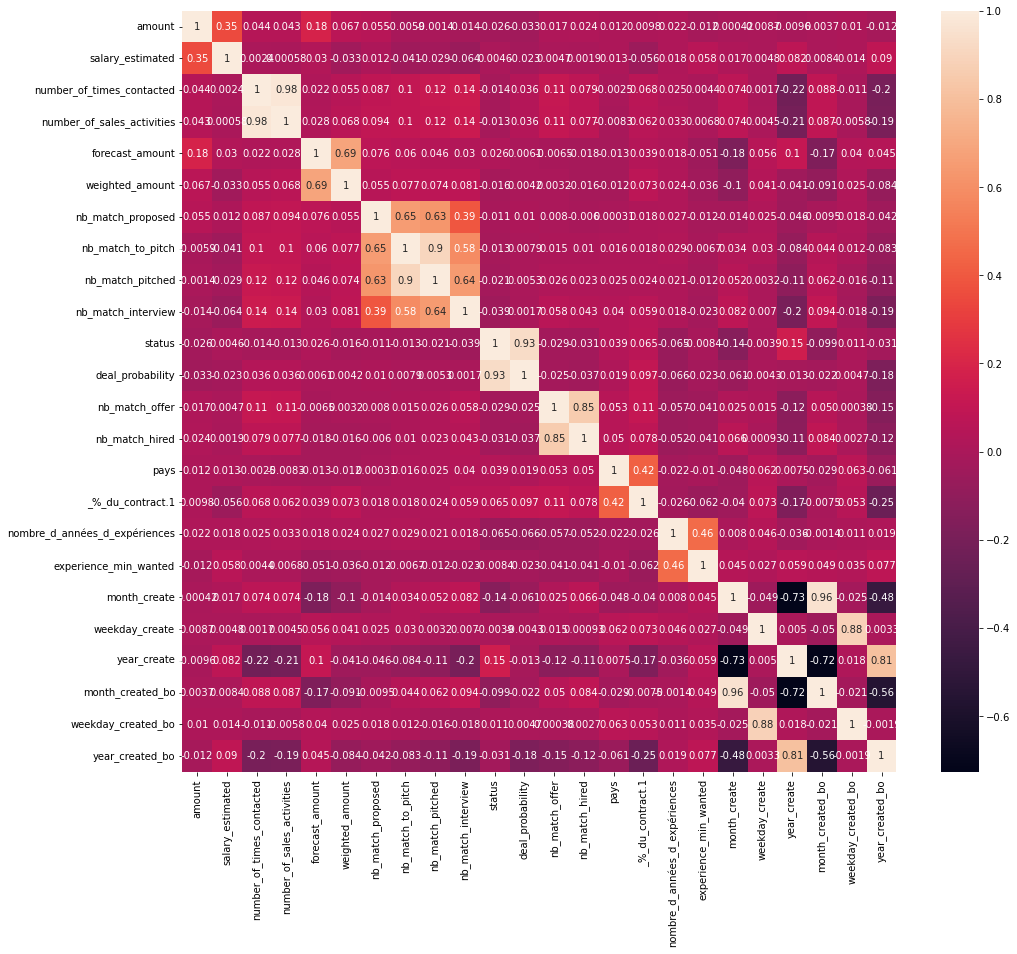

In [71]:
corr_matrix_zoom = df_multicoll.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix_zoom, annot = True)
plt.show()

In [73]:
df_ready_for_pred = df_for_prediction.drop(['number_of_times_contacted', 'forecast_amount', 'deal_probability', 'nb_match_to_pitch',
                                           'nb_match_proposed', 'nb_match_hired', 'pays', 'nombre_d_années_d_expériences', 'month_created_bo',
                                           'year_created_bo', 'weekday_created_bo'], axis = 1)

df_ready_for_pred.shape

(2885, 36)

# Scaling and Transforming our Data

First we need to do the train/test split :

In [74]:
X = df_ready_for_pred.drop(['amount'],axis=1)
y = df_ready_for_pred['amount']

In [75]:
# let's proceed to the train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then scale the variables :

In [76]:
# I choose to apply the StandardScaler :

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [77]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns )
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns  )
display(X_train_scaled.head())
display(X_test_scaled.head())

,number_of_sales_activities,weighted_amount,deals_duration,nb_match_pitched,nb_match_interview,salary_estimated,company_market_type,score_prévisionnel_de_l_opport,number_of_associated_contacts,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,pitch_validated,nb_match_offer,experience_min_wanted,potential_manager
0,-0.634378,-0.731162,0.527998,2.987956,1.370900,1.284032,0.843910,-0.517194,-1.850435,-0.326781,1.075163,-0.393033,-0.311381,-0.765672,-0.175623,0.580418,0.534476,-0.498508,-1.637139,-0.047637,0.881957,1.522041,-0.475199,-1.559804,1.648291,0.918584,1.471778,-0.763538,-0.164395,0.585788,0.209296,0.510405,-0.358443,1.134693,2.586398
1,1.365369,-0.731162,1.117333,-0.080372,-0.006041,-0.109460,0.785582,1.539698,-0.058239,-0.326781,-1.006962,-0.393033,-0.311381,-0.765672,-0.175623,-2.163549,-1.261638,0.129937,0.776323,-1.820966,-1.219588,-0.844804,0.621561,0.838296,-0.892113,1.521654,1.471778,-0.763538,-1.039317,-0.021306,0.209296,0.510405,-0.032740,1.134693,0.073757
2,0.565470,-0.731162,-0.405941,-0.701805,0.080018,-0.109460,0.960566,0.854067,-0.058239,-0.326781,1.075163,-0.393033,-0.311381,-0.765672,-0.175623,0.580418,0.534476,-0.498508,0.776323,1.725692,-1.219588,1.522041,0.621561,0.838296,-0.892113,-1.493695,0.030903,1.309692,-0.164395,-0.021306,0.209296,0.510405,-0.358443,-0.693107,1.330078
3,-0.204433,-0.347064,-0.981162,-0.313409,-0.350276,0.155967,0.552271,-1.202824,1.733957,2.019861,1.075163,-0.393033,-0.311381,1.306042,-0.175623,0.580418,1.731886,-1.126952,0.293631,-0.047637,-1.219588,1.048672,0.621561,0.358676,-0.892113,-0.287556,-0.689535,-0.763538,-1.039317,1.192882,0.209296,0.510405,1.270072,-0.693107,-0.554403
4,-0.984334,-0.427527,-0.077494,0.851778,-0.350276,-0.773027,2.127125,-1.202824,1.733957,0.611876,-1.006962,-0.393033,-0.311381,1.306042,-0.175623,-1.614756,-1.261638,-1.755396,-1.154446,1.725692,-1.219588,0.575303,0.621561,-0.120944,-0.892113,-1.192160,0.030903,1.309692,-0.747676,-0.021306,0.209296,0.510405,-0.358443,0.403573,0.701917


,number_of_sales_activities,weighted_amount,deals_duration,nb_match_pitched,nb_match_interview,salary_estimated,company_market_type,score_prévisionnel_de_l_opport,number_of_associated_contacts,tiering,croissance,réactivité_du_client,original_source_type,_%_du_contract.1,remplacement,concurrence_sur_le_poste_?,catégorie_métier_du_job,hubspot_team,la_boîte_attire-t-elle_nos_candidats_?,provenance_du_lead,new,capacité_d’ignition_à_répondre_au_besoin_?,forecast_category,urgence_du_recrutement,status,month_create,weekday_create,year_create,month_close,weekday_close,year_close,pitch_validated,nb_match_offer,experience_min_wanted,potential_manager
0,-0.884347,-0.047984,-0.619695,0.657580,0.510312,0.885891,0.552271,1.539698,-0.058239,-0.326781,-1.006962,-0.393033,-0.311381,-0.765672,-0.175623,0.580418,-0.662933,1.386825,0.776323,-0.047637,0.881957,-0.844804,0.621561,0.838296,-0.892113,-0.890625,-0.689535,1.309692,-0.456036,0.585788,0.209296,0.510405,-0.358443,1.134693,2.586398
1,-0.134441,-0.731162,0.466110,-0.896003,0.682430,-1.104811,0.960566,-0.517194,-0.058239,-0.326781,-1.006962,-0.393033,3.211499,1.306042,-0.175623,0.580418,-0.543192,0.129937,-1.637139,0.661694,0.881957,1.522041,0.621561,-1.559804,-0.892113,1.521654,-0.689535,-0.763538,1.585448,1.192882,0.206818,-1.959228,-0.032740,0.403573,0.701917
2,-0.254426,-0.047984,-0.981162,0.269185,-0.350276,-0.680128,-0.847600,-1.202824,-0.058239,-0.326781,1.075163,1.009007,-0.311381,1.306042,-0.175623,0.580418,0.534476,1.386825,0.293631,-0.047637,-1.219588,-0.844804,0.621561,-0.600564,-0.892113,0.013979,0.030903,-0.763538,1.002167,0.585788,0.206818,0.510405,-0.358443,-0.693107,-0.554403
3,0.165521,3.064275,0.368498,1.045976,0.510312,-0.295259,0.902238,-1.202824,-1.850435,0.142547,0.658738,-0.393033,3.211499,1.306042,-0.175623,0.580418,1.133181,-1.755396,-0.189062,-0.047637,-1.219588,0.101934,0.621561,0.358676,-0.892113,1.220119,0.030903,-0.763538,1.585448,0.585788,0.206818,0.510405,-0.358443,-0.693107,2.586398
4,0.415489,-0.731162,-0.752587,-1.090201,-1.210863,-1.635665,-0.497632,0.854067,-0.058239,-0.326781,1.075163,-0.393033,-0.311381,-0.765672,-0.175623,0.580418,0.534476,0.129937,-1.637139,0.661694,-1.219588,-0.844804,1.718321,0.838296,0.378089,1.823188,-1.409973,-0.763538,-1.039317,-1.235494,0.209296,0.510405,0.292963,-0.693107,0.073757


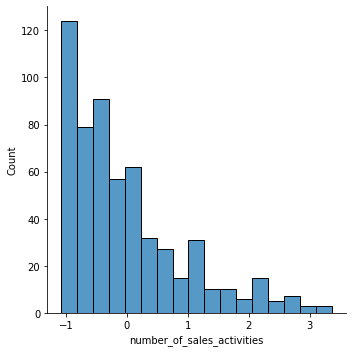

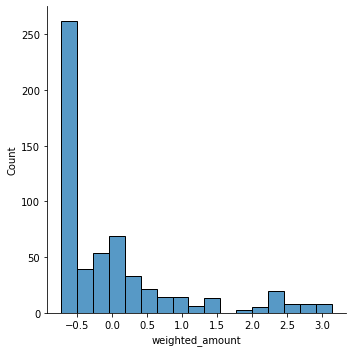

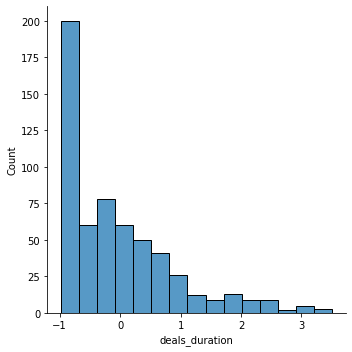

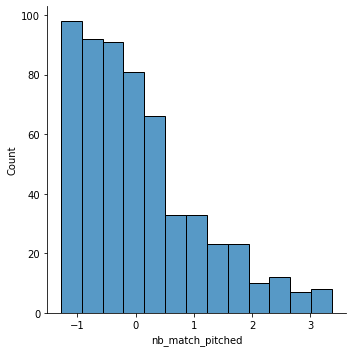

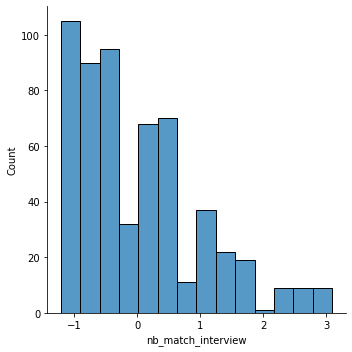

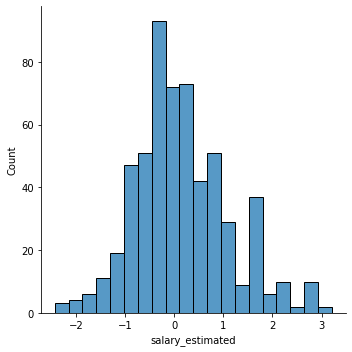

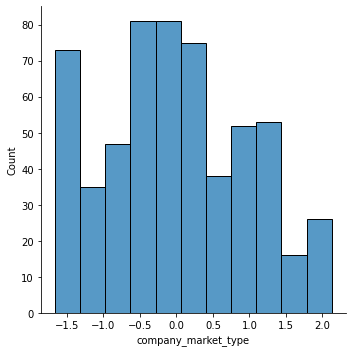

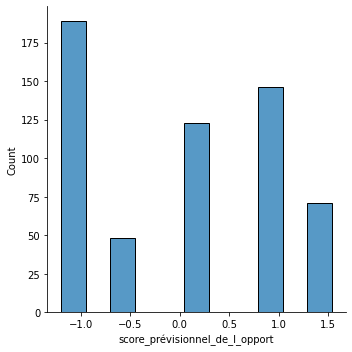

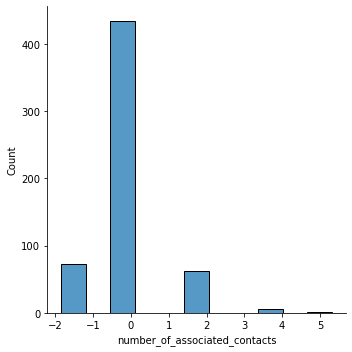

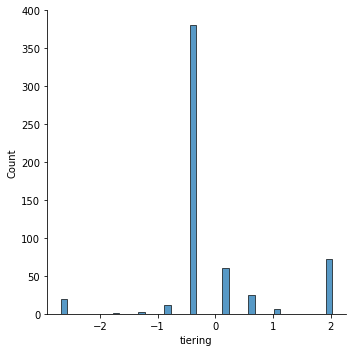

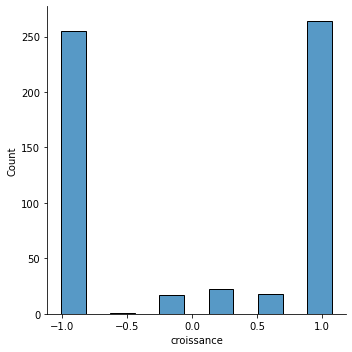

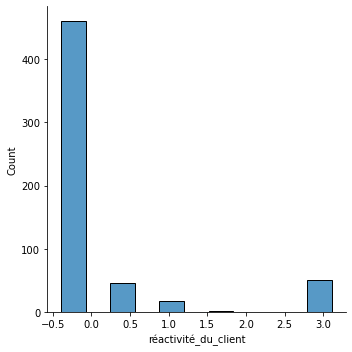

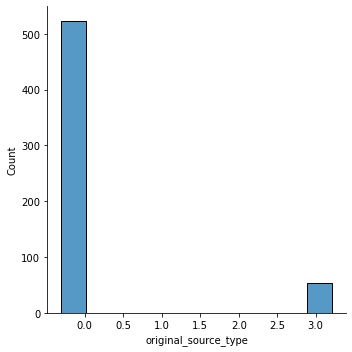

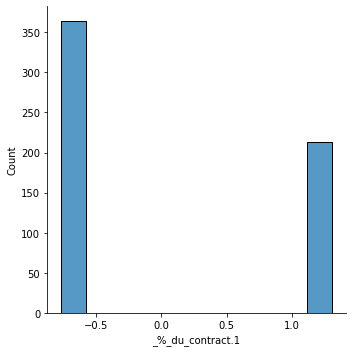

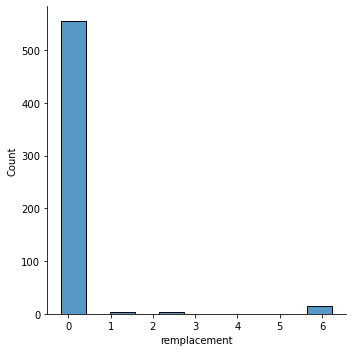

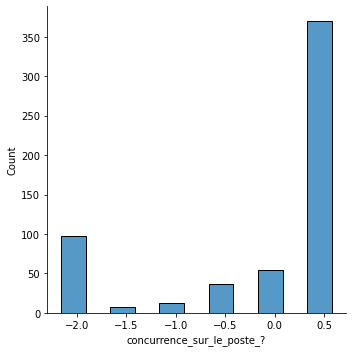

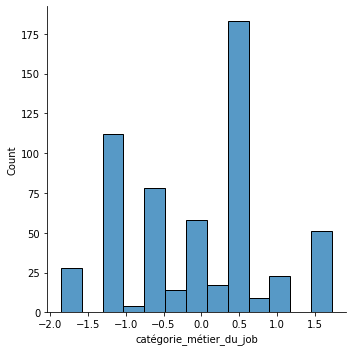

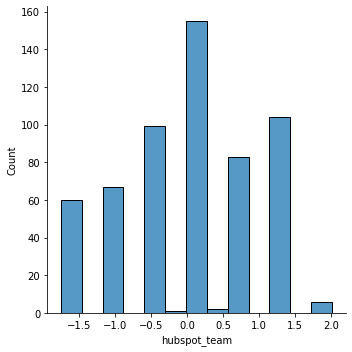

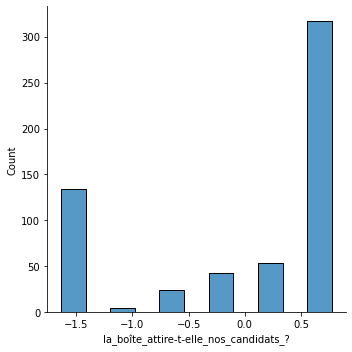

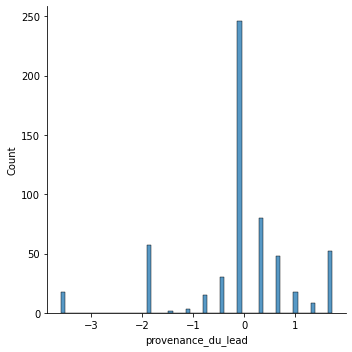

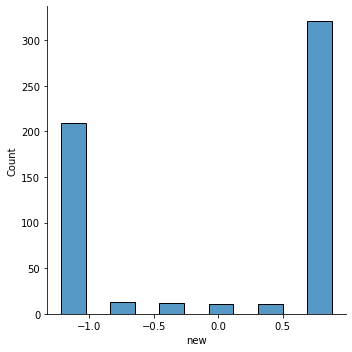

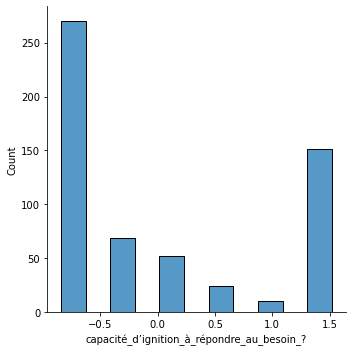

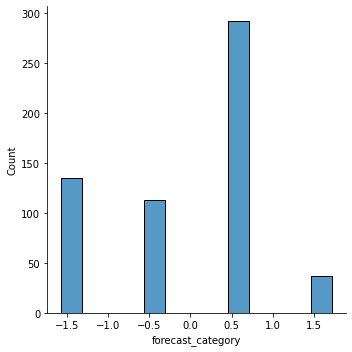

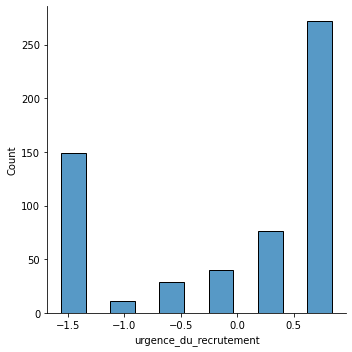

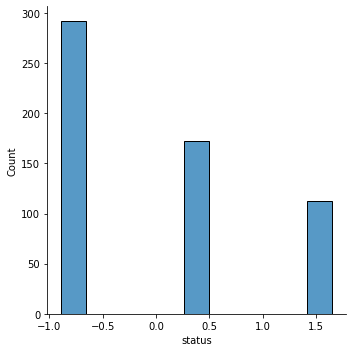

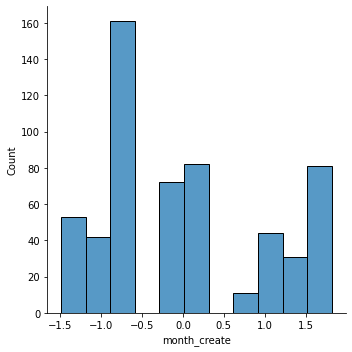

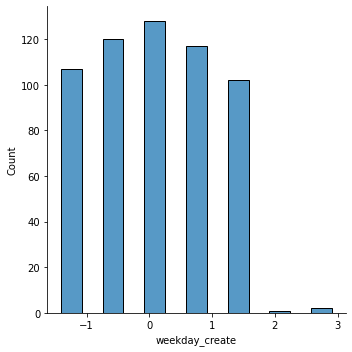

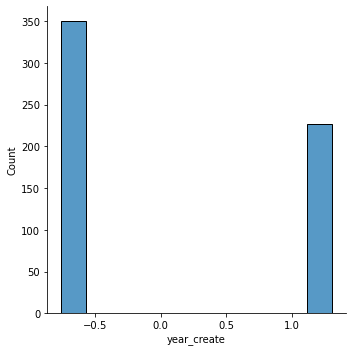

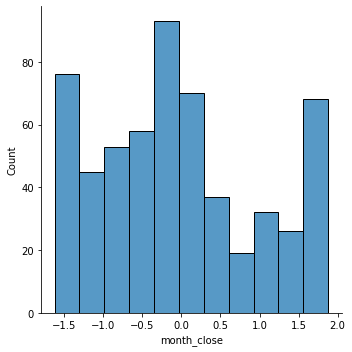

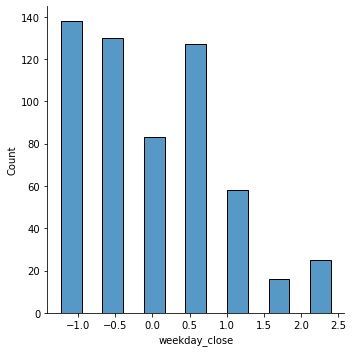

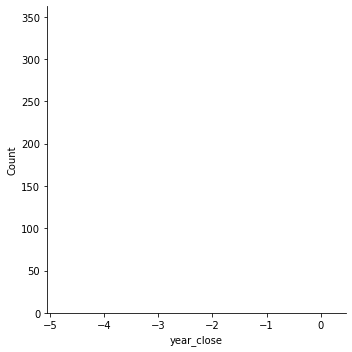

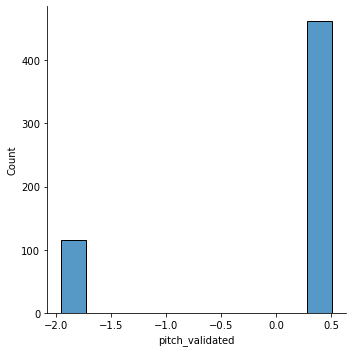

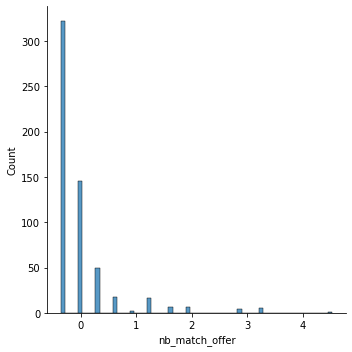

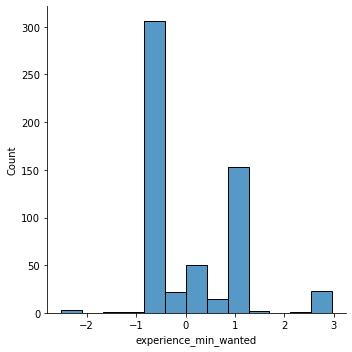

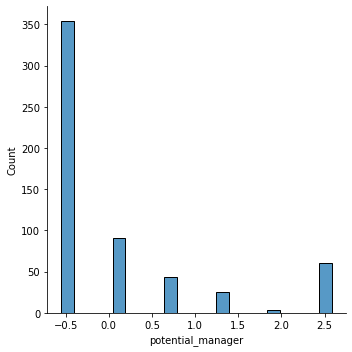

number_of_sales_activities                    None
weighted_amount                               None
deals_duration                                None
nb_match_pitched                              None
nb_match_interview                            None
salary_estimated                              None
company_market_type                           None
score_prévisionnel_de_l_opport                None
number_of_associated_contacts                 None
tiering                                       None
croissance                                    None
réactivité_du_client                          None
original_source_type                          None
_%_du_contract.1                              None
remplacement                                  None
concurrence_sur_le_poste_?                    None
catégorie_métier_du_job                       None
hubspot_team                                  None
la_boîte_attire-t-elle_nos_candidats_?        None
provenance_du_lead             

In [78]:
X_test_scaled.apply(plot_continuous)

# Building a predictive model for AMOUNT

Now that our variables are scaled, we can build the predictive model. We will do this with a function to be able to choose the best method and make vary the arguments

In [82]:
# let's first import the libraries we will need :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor # because we have numericals
from sklearn.neural_network import MLPRegressor

In [85]:
def test_functions(X_train, y_train, X_test, y_test) :
    
    lrm = LinearRegression().fit(X_train, y_train)
    y_pred_lrm_train = lrm.predict(X_train)
    print("R2 for train set with Linear Reg is :", r2_score(y_pred_lrm_train,y_train))
    y_pred_lrm_test = lrm.predict(X_test)
    print("R2 for test set with Linear Reg is :", r2_score(y_pred_lrm_test,y_test))
    print("MSE with Linear Reg is :", mean_squared_error(y_pred_lrm_test,y_test))
    
    print()
    
    knn_models = []  
    scores = []
    for k in range(2,20):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        knn_models.append(model)
        scores.append(model.score(X_test, y_test))
    for index,score in enumerate(scores):
        print("The R2 of the k-nn model with {} neighbours on the TEST set was: {:.2f}".format(index+2,score))
    
    plt.figure(figsize=(10,6))
    plt.plot(range(2,20),scores,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2-scores vs. K Value')
    plt.xticks(range(1,16))
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    
    print()
    
    mlp = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)
    y_pred_mlp_train = mlp.predict(X_train)
    y_pred_mlp_test = mlp.predict(X_test)
    
    print("Score with MLP for train set is :", mlp.score(X_train, y_train))
    
    print("Score with MLP for test set is :", mlp.score(X_test, y_test))
    

R2 for train set with Linear Reg is : -4.893200474560677
R2 for test set with Linear Reg is : -5.013498919382423
MSE with Linear Reg is : 10923226.644632405

The R2 of the k-nn model with 2 neighbours on the TEST set was: -0.11
The R2 of the k-nn model with 3 neighbours on the TEST set was: -0.04
The R2 of the k-nn model with 4 neighbours on the TEST set was: 0.06
The R2 of the k-nn model with 5 neighbours on the TEST set was: 0.09
The R2 of the k-nn model with 6 neighbours on the TEST set was: 0.12
The R2 of the k-nn model with 7 neighbours on the TEST set was: 0.13
The R2 of the k-nn model with 8 neighbours on the TEST set was: 0.13
The R2 of the k-nn model with 9 neighbours on the TEST set was: 0.15
The R2 of the k-nn model with 10 neighbours on the TEST set was: 0.15
The R2 of the k-nn model with 11 neighbours on the TEST set was: 0.15
The R2 of the k-nn model with 12 neighbours on the TEST set was: 0.16
The R2 of the k-nn model with 13 neighbours on the TEST set was: 0.16
The R2 o

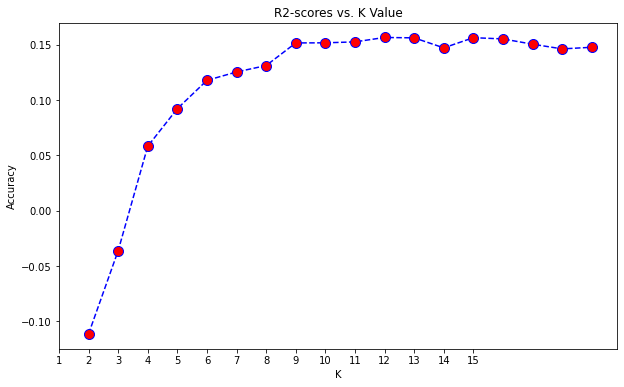

In [86]:
test_functions(X_train, y_train, X_test, y_test)